# Accessing 2D/3D data

Boilerplate

In [1]:
import numpy as np
from postcactus.simdir import SimDir
%matplotlib inline
import matplotlib.pyplot as plt

For working with 2D/3D grid data, we need another module

In [2]:
from postcactus import grid_data as gd

For plotting 2D data with matplotlib, postcactus defines helper functions:

In [7]:
from postcactus import visualize as viz

Get object representing simulation data

In [3]:
example_data = "~/bns_minimal_example"
sd = SimDir(example_data)

All 2d data accessed through `sd.grid.xy`, `.xz`, `.yz`

In [4]:
print sd.grid.xy


Available grid data of dimension (0, 1) (including cuts): 
['polar_coords_old', 'merger_xy', 'hmns_moments_old', 'hmns_moments', 'merger_xy_v2', 'polar_coords', 'grid_export_29ms_disk160km_remap', 'merger', 'merger_xy_t13_15', 'merger_xy_t7_9', 'merger_xy_disk', 'grid_export_29ms_disk80km_remap', 'merger_xy_v3', 'grid_export_29ms_remnant_transf_WRONG', 'rho', 'grid_export_29ms_remnant_remap']



For plotting, best resample to uniform grids while loading. Create object describing desired regular grid:

In [5]:
n_pts = 400
corner0 = [-60.,-20.]
corner1 = [60., 20.]
g = gd.RegGeom([n_pts, n_pts], corner0, x1=corner1)

Load and resample

In [6]:
it = 0
rho = sd.grid.xy.read('rho', it, geom=g, order=2)

rho contains data and coordinates. We can plot it using helper function

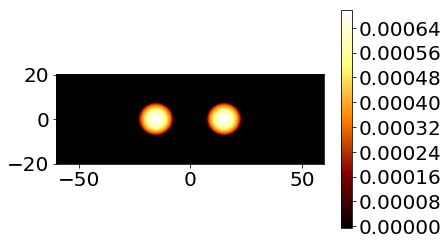

In [8]:
viz.plot_color(rho, cmap='afmhot', bar=True)

Grid data objects support arithmetic operations (binary ops only if size matches)

In [9]:
lgrho = rho.log10()

/home/smeagol/soft/anaconda2/envs/pycactuset/lib/python2.7/site-packages/postcactus/grid_data.py:853: RuntimeWarning: invalid value encountered in log10
  return self.dress(op(self.data))


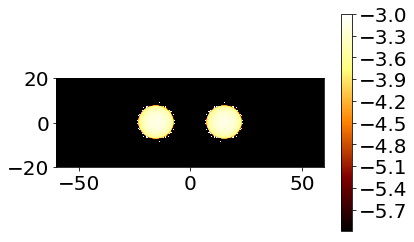

In [15]:
viz.plot_color(lgrho, cmap='afmhot', bar=True, vmin=-6, vmax=-3)

Load another grid, now in xz plane

In [39]:
gsize = np.array([30,30])
x0 = np.array([-30,-15])
npts2 = 200
g2 = gd.RegGeom([npts2]*2, x0, x1=x0+gsize)
rho2 = sd.grid.xz.read('rho', it, geom=g2, order=0)

Reductions on the loaded regular gridded data are supported

In [40]:
maxrho = rho.max()

Plot contours on top of color plot, adjust plot limits to data

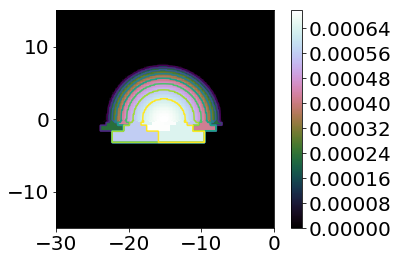

In [44]:
viz.plot_color(rho2, cmap='cubehelix', bar=True, interpolation='nearest')
lvl = np.linspace(0,maxrho, 10)[1:-1]
viz.plot_contour(rho2,lvl)
viz.adj_limits(rho2)

Oh no! The simulation used z-symmetry! We only see ghost zone data at $z<0$. Regions not covered by data are set to zero while loading.

Let's fix that. We use a wrapper that converts a source for grid data into one that behaves the same, but transparently aplies symmetry conditions. If the data actually covers the full domain, symmetry is not applied.

In [26]:
from postcactus.cactus_grid_h5 import GridReaderUndoSymRefl

In [31]:
sym_dims = [2] # z-axis 
sxz = GridReaderUndoSymRefl(sd.grid.xz, [2])

Now we load the data as before, but using the wrapper

In [28]:
rho3 = sxz.read('rho', it, geom=g2, order=2)

That looks better:

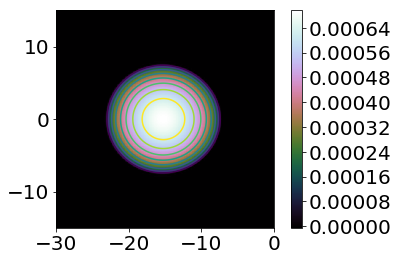

In [29]:
viz.plot_color(rho3, cmap='cubehelix', bar=True)
viz.plot_contour(rho3,lvl)
viz.adj_limits(rho3)